In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [40]:
df_index = pd.read_csv('economic_index.csv')

In [41]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [42]:
## drop unnecessary column 
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [43]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

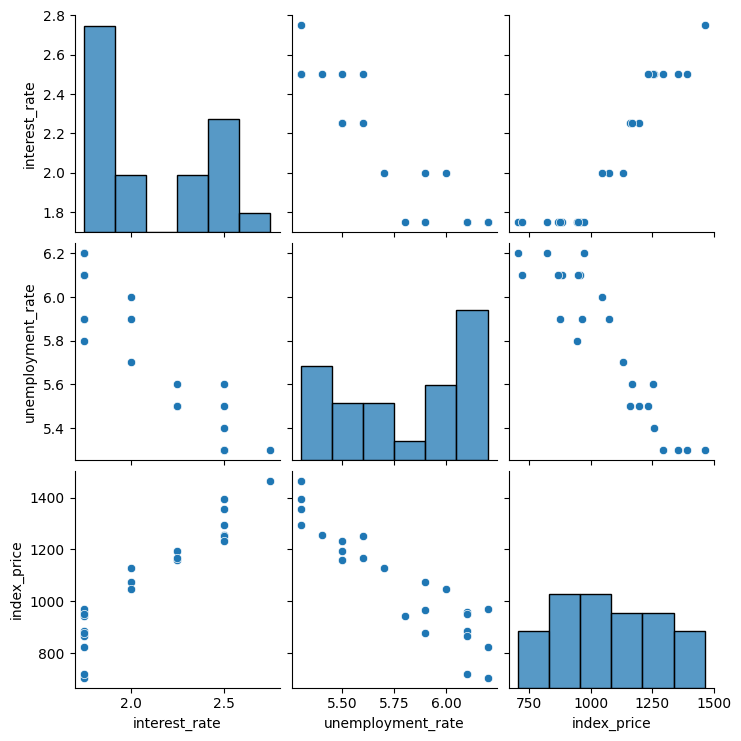

In [44]:
###Visualisation

import seaborn as sns
sns.pairplot(df_index)

In [45]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployement rate')

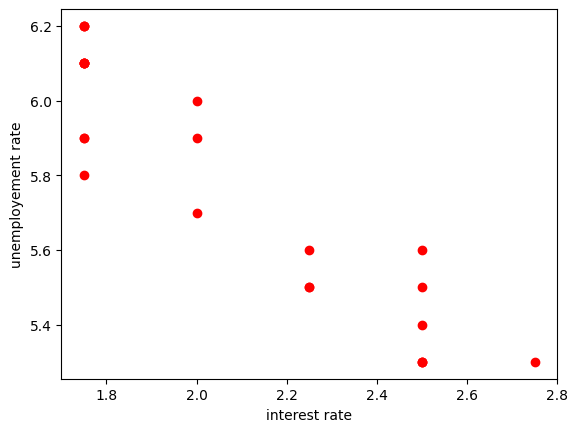

In [46]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('interest rate')
plt.ylabel('unemployement rate')

In [47]:
## independent dependent feature

X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [48]:
X.head

<bound method NDFrame.head of     interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1>

In [49]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [50]:
#train test split

#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

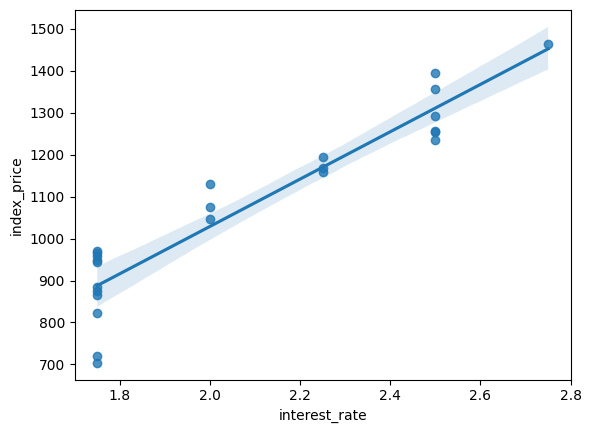

In [51]:
import seaborn as sns

sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

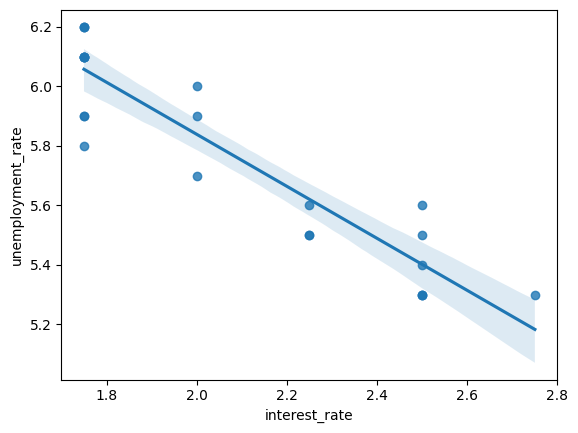

In [52]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

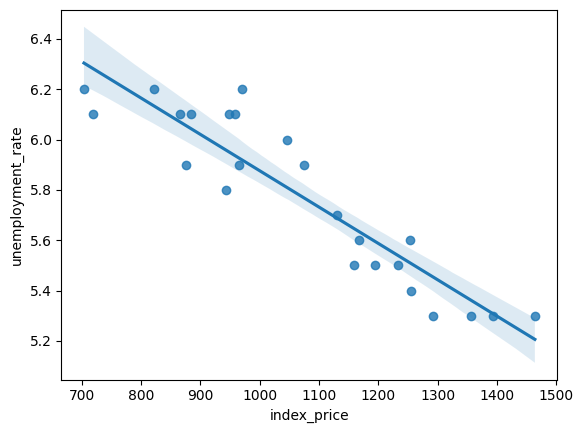

In [53]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
from sklearn.linear_model import LinearRegression

In [80]:
regression = LinearRegression(n_jobs=-1)

In [81]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [82]:
##cross validiation
from sklearn.model_selection import cross_val_score

In [83]:
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error'
                                   ,cv=3)

In [84]:
np.mean(validation_score)

np.float64(-5914.828180162388)

In [85]:
##prediction 

y_pred=regression.predict(X_test)

In [86]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [87]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [88]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


In [89]:
##Assumptions

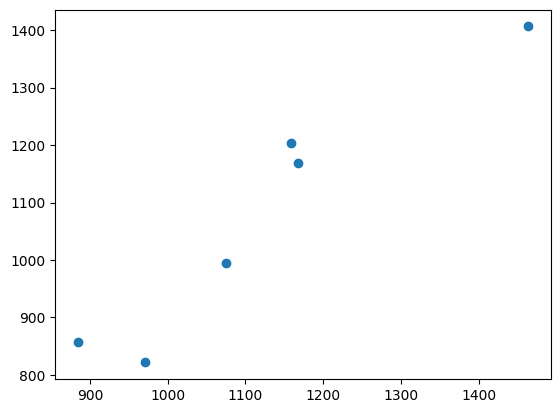

In [90]:
plt.scatter(y_test,y_pred)

In [91]:
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


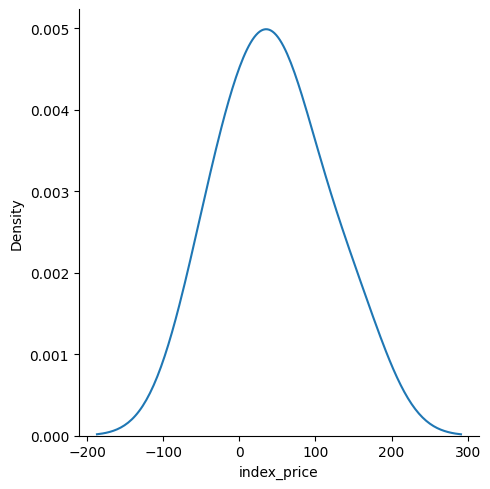

In [92]:
sns.displot(residuals,kind='kde')

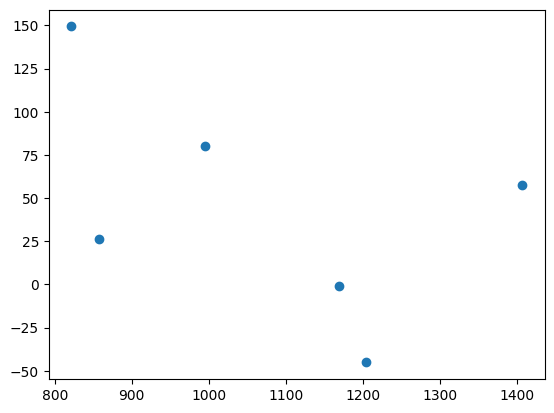

In [93]:
plt.scatter(y_pred,residuals)


In [94]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
print (prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [95]:
model.summary()

c:\Users\Najibmch12\Desktop\PYTHON\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 23 Jan 2025   Prob (F-statistic):                       0.754
Time:                        19:17:23   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
regression.coef_

array([  88.27275507, -116.25716066])

In [97]:
regression.intercept_

np.float64(1053.4444444444443)